In [9]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [13]:
TRAIN_DIR = 'image/train'
TEST_DIR = 'image/test'

In [11]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [14]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [15]:
print(train)

                               image     label
0            image/train\angry\0.jpg     angry
1            image/train\angry\1.jpg     angry
2           image/train\angry\10.jpg     angry
3        image/train\angry\10002.jpg     angry
4        image/train\angry\10016.jpg     angry
...                              ...       ...
28816  image/train\surprise\9969.jpg  surprise
28817  image/train\surprise\9985.jpg  surprise
28818  image/train\surprise\9990.jpg  surprise
28819  image/train\surprise\9992.jpg  surprise
28820  image/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [16]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [17]:
print(test)
print(test['image'])

                             image     label
0       image/test\angry\10052.jpg     angry
1       image/test\angry\10065.jpg     angry
2       image/test\angry\10079.jpg     angry
3       image/test\angry\10095.jpg     angry
4       image/test\angry\10121.jpg     angry
...                            ...       ...
7061  image/test\surprise\9806.jpg  surprise
7062  image/test\surprise\9830.jpg  surprise
7063  image/test\surprise\9853.jpg  surprise
7064  image/test\surprise\9878.jpg  surprise
7065   image/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         image/test\angry\10052.jpg
1         image/test\angry\10065.jpg
2         image/test\angry\10079.jpg
3         image/test\angry\10095.jpg
4         image/test\angry\10121.jpg
                    ...             
7061    image/test\surprise\9806.jpg
7062    image/test\surprise\9830.jpg
7063    image/test\surprise\9853.jpg
7064    image/test\surprise\9878.jpg
7065     image/test\surprise\993.jpg
Name: image, Length: 7066, d

In [18]:
from tqdm.notebook import tqdm

In [19]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [20]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [21]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [22]:
x_train = train_features/255.0
x_test = test_features/255.0

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [25]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [26]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [27]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [28]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [29]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 [==============================] - 564s 2s/step - loss: 1.8222 - accuracy: 0.2448 - val_loss: 1.7918 - val_accuracy: 0.2577
Epoch 2/100
226/226 [==============================] - 629s 3s/step - loss: 1.7964 - accuracy: 0.2540 - val_loss: 1.7622 - val_accuracy: 0.2632
Epoch 3/100
226/226 [==============================] - ETA: 0s - loss: 1.7139 - accuracy: 0.3020

KeyboardInterrupt: 

In [31]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [32]:

from keras.models import model_from_json

In [34]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [35]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [36]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [39]:
image = "C:/Facial Emotion Recognition Mdel/image/train/angry/120.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 159ms/step
model prediction is  angry


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 39ms/step
model prediction is  sad


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


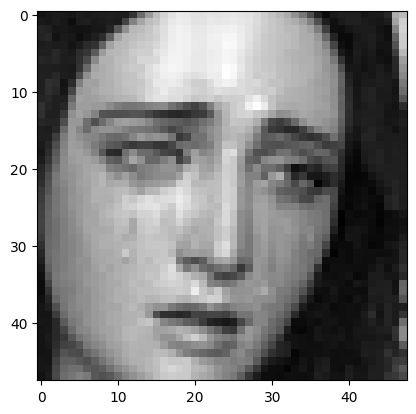

In [41]:
image = "C:/Facial Emotion Recognition Mdel/image/train/sad/159.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 39ms/step
model prediction is  fear


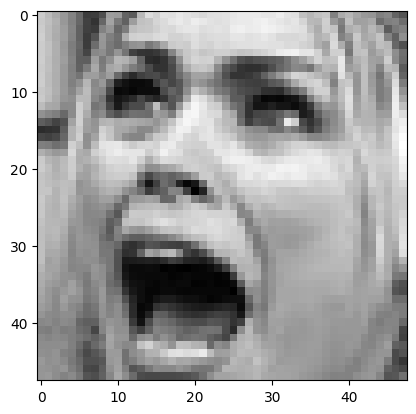

In [42]:
image = "C:/Facial Emotion Recognition Mdel/image/train/fear/2250.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 35ms/step
model prediction is  disgust


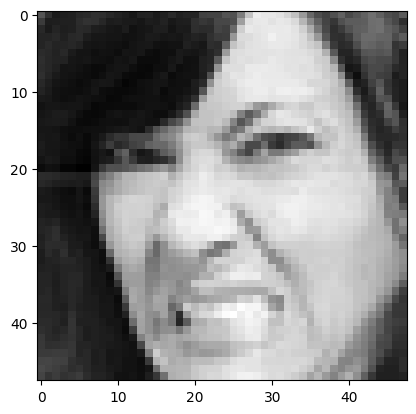

In [43]:
image = "C:/Facial Emotion Recognition Mdel/image/train/disgust/4078.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 32ms/step
model prediction is  happy


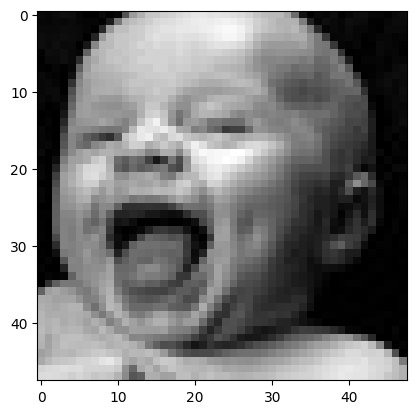

In [44]:
image = "C:/Facial Emotion Recognition Mdel/image/train/happy/103.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 31ms/step
model prediction is  surprise


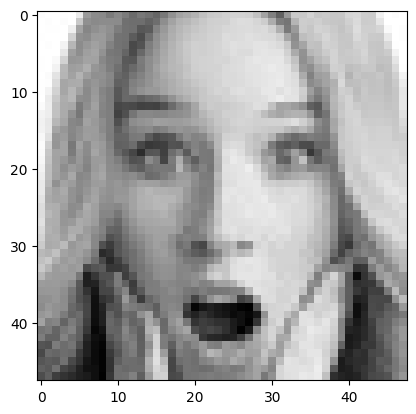

In [45]:
image = "C:/Facial Emotion Recognition Mdel/image/train/surprise/497.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')